In [3]:
import pandas as pd
import numpy as np
np.random.seed(0)
from scipy.optimize import linear_sum_assignment

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = 20, 13
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 2
import seaborn as sns

import sys
sys.path.insert(0, '../../..')
import assignment
import leximin_assignment
import matrix_gen

from tqdm import tqdm

import warnings

In [4]:
def custom_eff_assignment(cost_matrix, capacities):
    full_cost_matrix = np.repeat(cost_matrix, capacities, axis=1)
    row_ind, col_ind = linear_sum_assignment(full_cost_matrix)
    
    return full_cost_matrix[row_ind, col_ind].sum()

In [5]:
N = 30
N_INTVS = 5
N_EXPERIMENTS = 1000
CAPACITIES = np.ones((N_INTVS,), dtype=int) * (N // N_INTVS)

ALPHAS = [1, 1e-5, 1e-10, 1e-15, 1e-20, 1e-25, 1e-30]
BETAS = [1, 1e-5, 1e-10, 1e-15, 1e-20, 1e-25, 1e-30]

In [6]:
pof_pop = [[[] for __ in BETAS] for _ in ALPHAS]

for a_id, a in enumerate(ALPHAS):
    for b_id, b in enumerate(BETAS):
        print(a, b)
        
        matrix_generator = matrix_gen.MatrixGenerator(
            np.random.beta, (a, b), N, N_INTVS
        )
        
        success_count = 0
        while success_count < N_EXPERIMENTS:
            # print(a, b, success_count)
            
            (_, sorted_matrix), (__, sorted_increase_matrix) = matrix_generator.get_increase_matrix_pair(
                round_=False
            )


            # Efficient
            eff_cost = custom_eff_assignment(sorted_matrix, CAPACITIES)

            # Leximin
            lex_assigner = leximin_assignment.RowSortedLeximinAssignmentHelper(
                sorted_increase_matrix, CAPACITIES
            )
            lex_assignments = lex_assigner.solve()
            lex_cost = lex_assigner.get_cost(
                lex_assignments, cost_matrix=sorted_matrix
            )
            
            if lex_cost < eff_cost or lex_cost > 29 * eff_cost:
                continue

            
            if eff_cost == 0:
                pof_pop[a_id][b_id].append(1)
            else:
                pof_pop[a_id][b_id].append(lex_cost / eff_cost)
            success_count += 1
        
        print(np.mean(pof_pop[a_id][b_id]))

1 1
1.046519875769615
1 1e-05
1.0
1 1e-10
1.0
1 1e-15
1.0
1 1e-20
1.0
1 1e-25
1.0
1 1e-30
1.0
1e-05 1
1.0
1e-05 1e-05
1.1222618560482442
1e-05 1e-10
1.0
1e-05 1e-15
1.0
1e-05 1e-20
1.0
1e-05 1e-25
1.0
1e-05 1e-30
1.0
1e-10 1
1.0
1e-10 1e-05
1.0
1e-10 1e-10
1.1268570346320346
1e-10 1e-15
1.0
1e-10 1e-20
1.0
1e-10 1e-25
1.0
1e-10 1e-30
1.0
1e-15 1
1.0
1e-15 1e-05
1.0
1e-15 1e-10
1.0
1e-15 1e-15
1.122787914862915
1e-15 1e-20
1.0
1e-15 1e-25
1.0
1e-15 1e-30
1.0
1e-20 1
1.0
1e-20 1e-05
1.0
1e-20 1e-10
1.0
1e-20 1e-15
1.0
1e-20 1e-20
1.1345974747474747
1e-20 1e-25
1.0
1e-20 1e-30
1.0
1e-25 1
1.0
1e-25 1e-05
1.0
1e-25 1e-10
1.0
1e-25 1e-15
1.0
1e-25 1e-20
1.0
1e-25 1e-25
1.1224145493395494
1e-25 1e-30
1.0
1e-30 1
1.0
1e-30 1e-05
1.0
1e-30 1e-10
1.0
1e-30 1e-15
1.0
1e-30 1e-20
1.0
1e-30 1e-25
1.0
1e-30 1e-30
1.118571212121212


# 30x5 matrices

# Matrices that are not rounded with custom efficient assigner

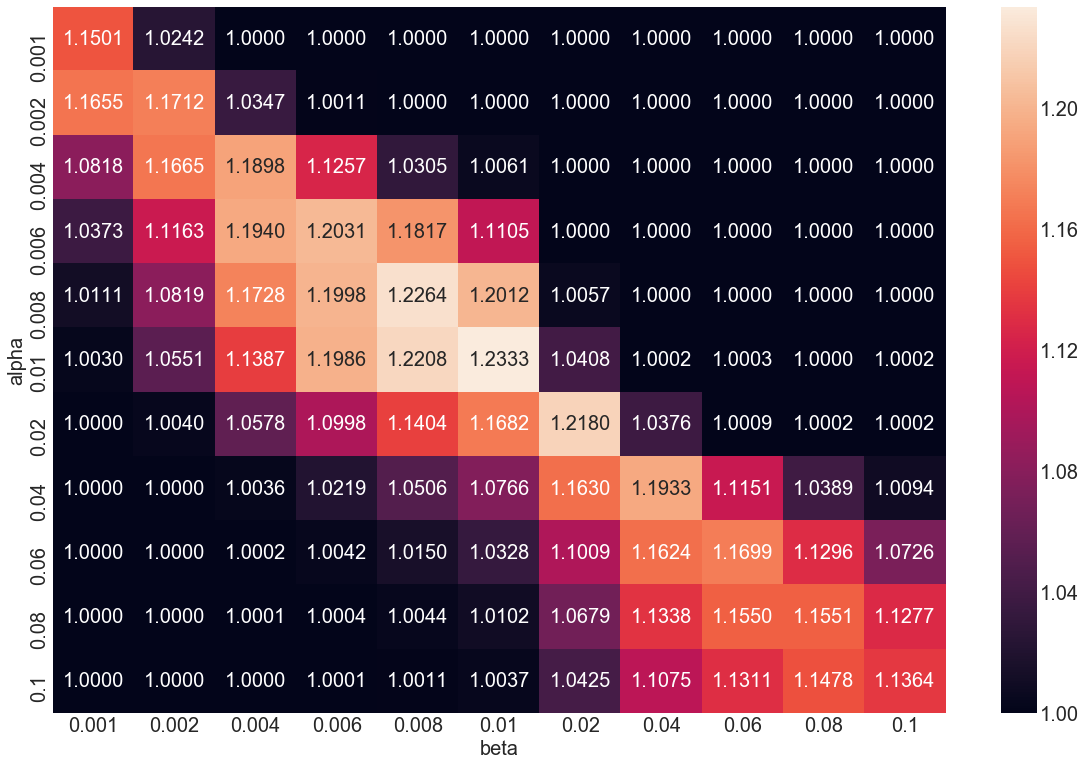

In [5]:
sns.heatmap(
    np.mean(pof_pop, axis=2),
    annot=True, fmt='.4f',
    xticklabels=BETAS, yticklabels=ALPHAS
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()

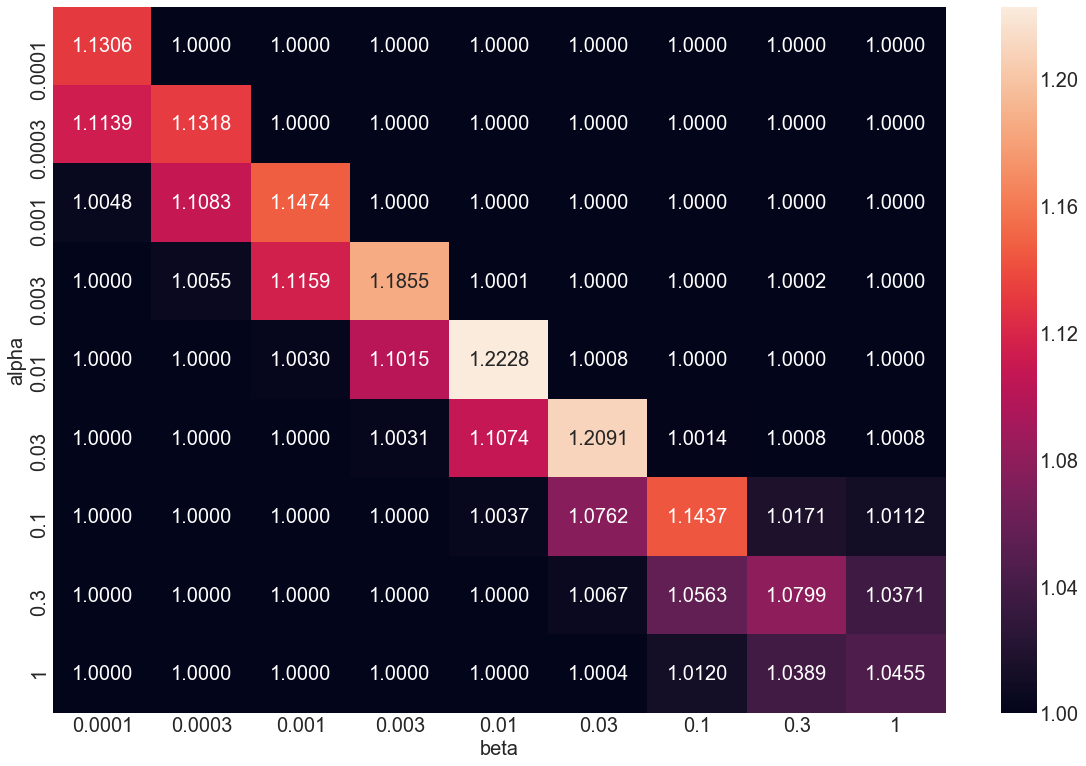

In [9]:
sns.heatmap(
    np.mean(pof_pop, axis=2),
    annot=True, fmt='.4f',
    xticklabels=BETAS, yticklabels=ALPHAS
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()

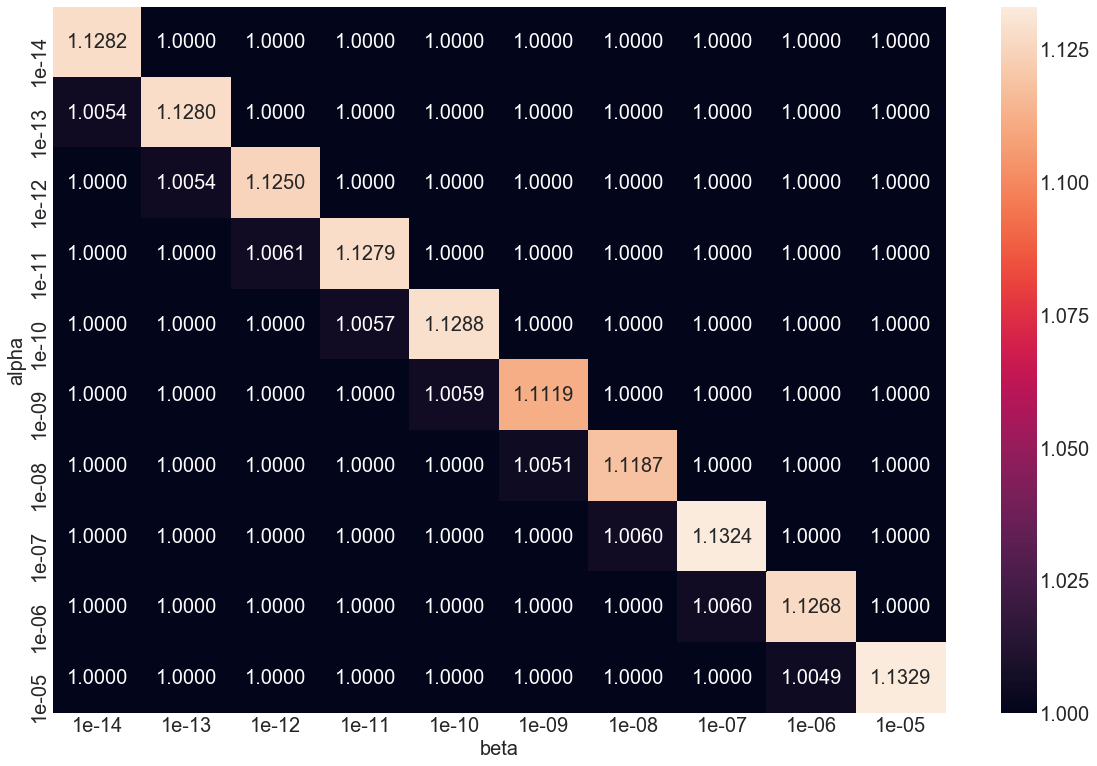

In [8]:
sns.heatmap(
    np.flip(np.mean(pof_pop, axis=2)),
    annot=True, fmt='.4f',
    xticklabels=np.flip(BETAS), yticklabels=np.flip(ALPHAS)
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()

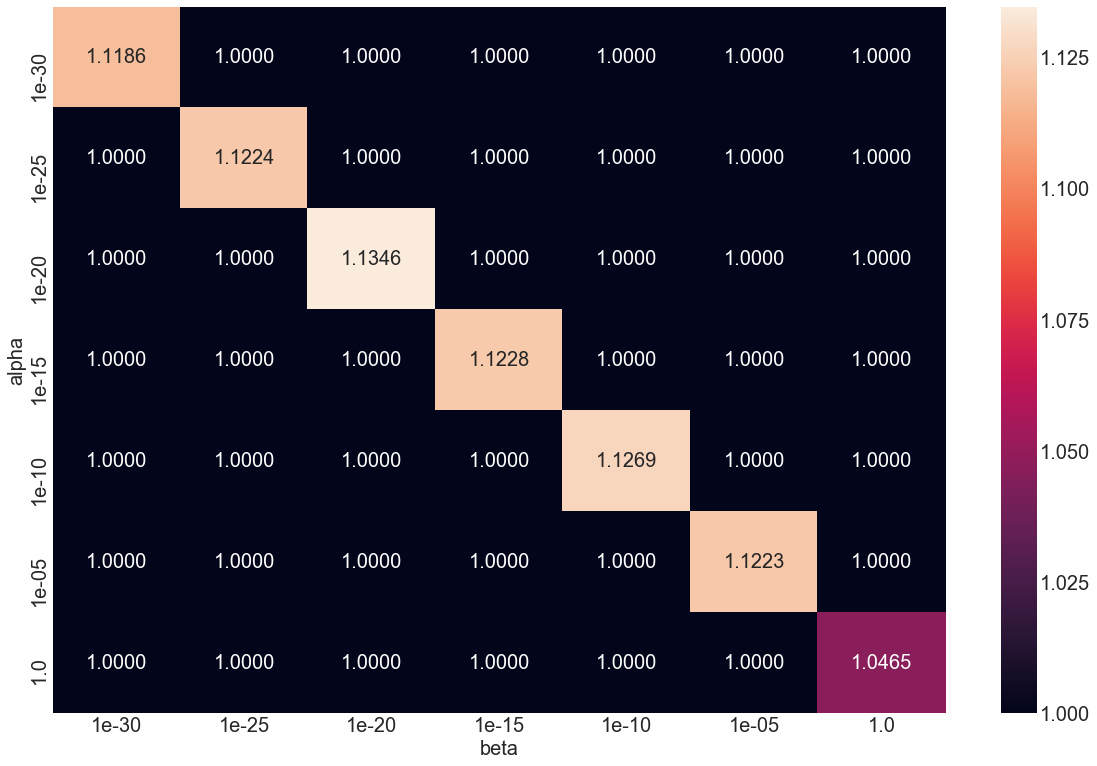

In [7]:
sns.heatmap(
    np.flip(np.mean(pof_pop, axis=2)),
    annot=True, fmt='.4f',
    xticklabels=np.flip(BETAS), yticklabels=np.flip(ALPHAS)
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()

# Non heat map

In [14]:
N = 30
N_INTVS = 5
N_EXPERIMENTS = 1000
CAPACITIES = np.ones((N_INTVS,), dtype=int) * (N // N_INTVS)

param_combins = [
    1, 1e-1, 1e-2, 1e-3, 1e-4,
    1e-5, 1e-6, 1e-7, 1e-8, 1e-9
]

In [15]:
pof_pop = [[] for _ in param_combins]

for i, param in enumerate(param_combins):
    print(param)
    
    matrix_generator = matrix_gen.MatrixGenerator(
        np.random.beta, (param, param), N, N_INTVS
    )

    success_count = 0
    while success_count < N_EXPERIMENTS:
        # print(a, b, success_count)

        (_, sorted_matrix), (__, sorted_increase_matrix) = matrix_generator.get_increase_matrix_pair(
            round_=False
        )


        # Efficient
        eff_cost = custom_eff_assignment(sorted_matrix, CAPACITIES)

        # Leximin
        lex_assigner = leximin_assignment.RowSortedLeximinAssignmentHelper(
            sorted_increase_matrix, CAPACITIES
        )
        lex_assignments = lex_assigner.solve()
        lex_cost = lex_assigner.get_cost(
            lex_assignments, cost_matrix=sorted_matrix
        )

        if lex_cost < eff_cost or lex_cost > 29 * eff_cost:
            continue


        if eff_cost == 0:
            pof_pop[i].append(1)
        else:
            pof_pop[i].append(lex_cost / eff_cost)
        success_count += 1

    print(np.mean(pof_pop[i]))

1
1.0477966533394465
0.1
1.142672216047622
0.01
1.2203467627253017
0.001
1.1435160254972274
0.0001
1.1328933408005273
1e-05
1.1378625379057397
1e-06
1.1283985209213978
1e-07
1.1193851592851594
1e-08
1.1320406926406927
1e-09
1.1310325757575757


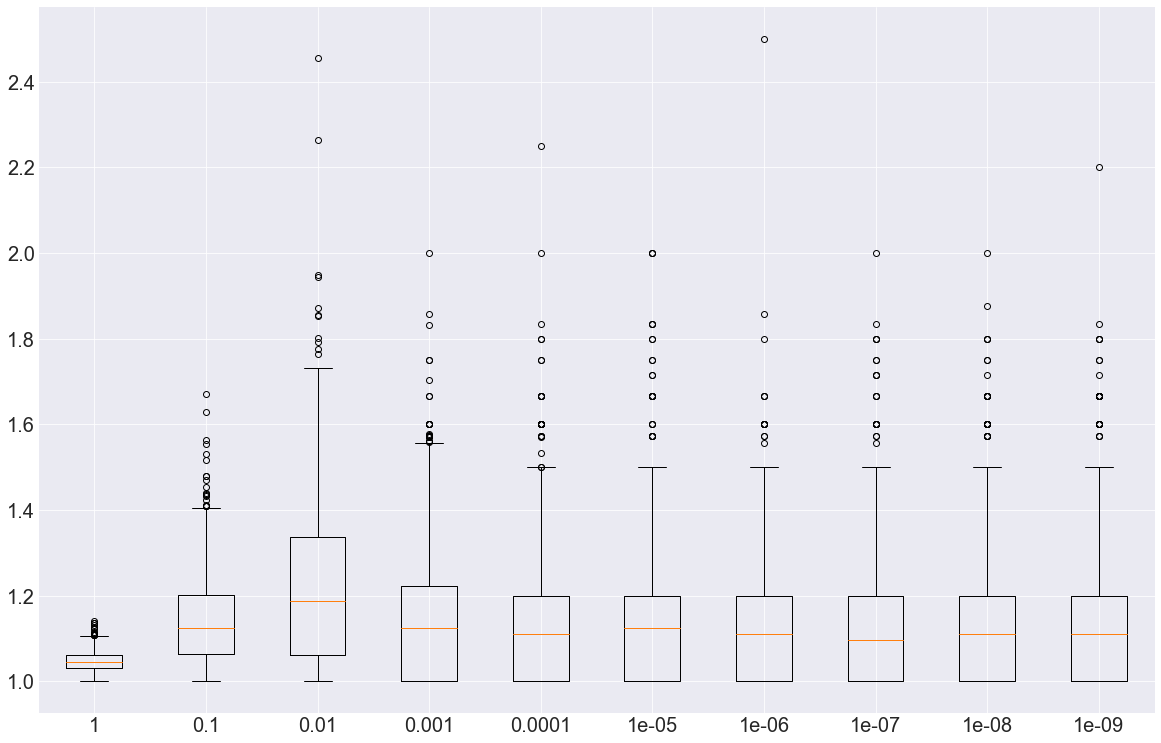

In [17]:
plt.boxplot(pof_pop, labels=param_combins)
plt.show()

# 30x30 matrices

In [18]:
N = 30
N_INTVS = 30
N_EXPERIMENTS = 1000
CAPACITIES = np.ones((N_INTVS,), dtype=int) * (N // N_INTVS)

param_combins = [
    1, 1e-1, 1e-2, 1e-3, 1e-4,
    1e-5, 1e-6, 1e-7, 1e-8, 1e-9
]

In [19]:
pof_pop = [[] for _ in param_combins]

for i, param in enumerate(param_combins):
    print(param)
    
    matrix_generator = matrix_gen.MatrixGenerator(
        np.random.beta, (param, param), N, N_INTVS
    )

    success_count = 0
    while success_count < N_EXPERIMENTS:
        # print(a, b, success_count)

        (_, sorted_matrix), (__, sorted_increase_matrix) = matrix_generator.get_increase_matrix_pair(
            round_=False
        )


        # Efficient
        eff_cost = custom_eff_assignment(sorted_matrix, CAPACITIES)

        # Leximin
        lex_assigner = leximin_assignment.RowSortedLeximinAssignmentHelper(
            sorted_increase_matrix, CAPACITIES
        )
        lex_assignments = lex_assigner.solve()
        lex_cost = lex_assigner.get_cost(
            lex_assignments, cost_matrix=sorted_matrix
        )

        if lex_cost < eff_cost or lex_cost > 29 * eff_cost:
            continue


        if eff_cost == 0:
            pof_pop[i].append(1)
        else:
            pof_pop[i].append(lex_cost / eff_cost)
        success_count += 1

    print(np.mean(pof_pop[i]))

1
1.0742838636493721
0.1
1.1961839527992986
0.01
1.2327014003286831
0.001
1.1036121792370304
0.0001
1.0620392009394763
1e-05
1.0586281852211799
1e-06
1.0608102203352203
1e-07
1.0612305555555555
1e-08
1.0575052308802309
1e-09
1.0577251914751915


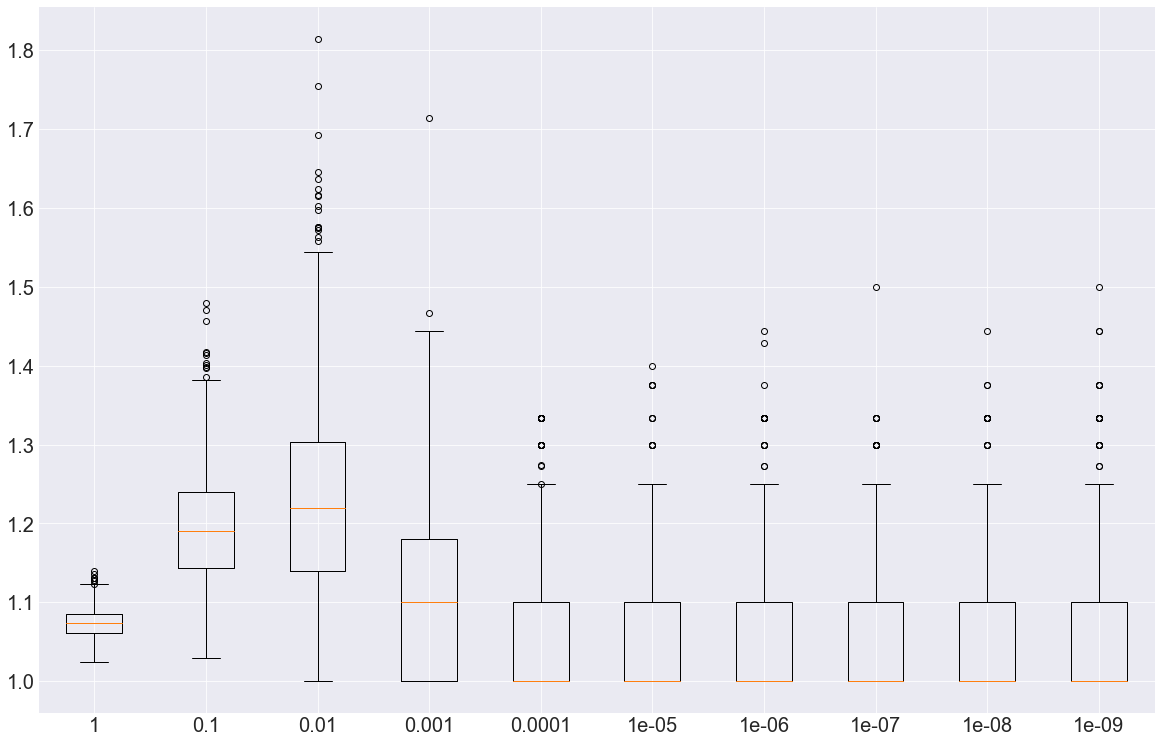

In [20]:
plt.boxplot(pof_pop, labels=param_combins)
plt.show()

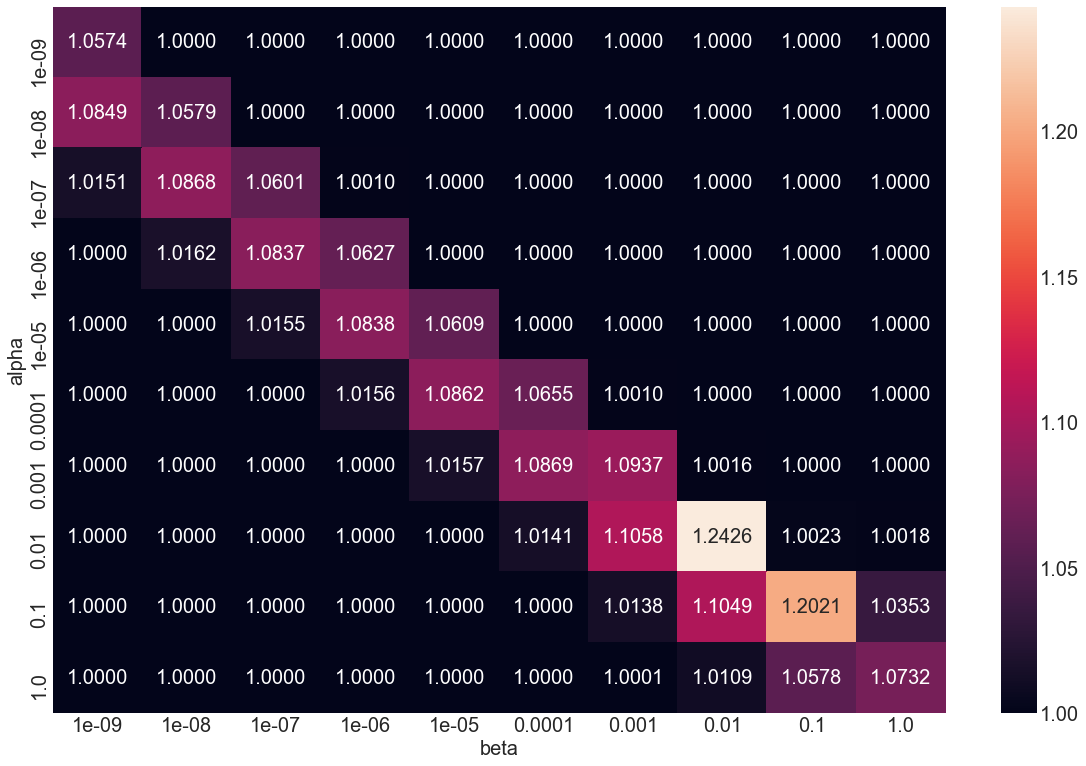

In [27]:
sns.heatmap(
    np.flip(np.mean(pof_pop, axis=2)),
    annot=True, fmt='.4f',
    xticklabels=np.flip(BETAS), yticklabels=np.flip(ALPHAS)
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()

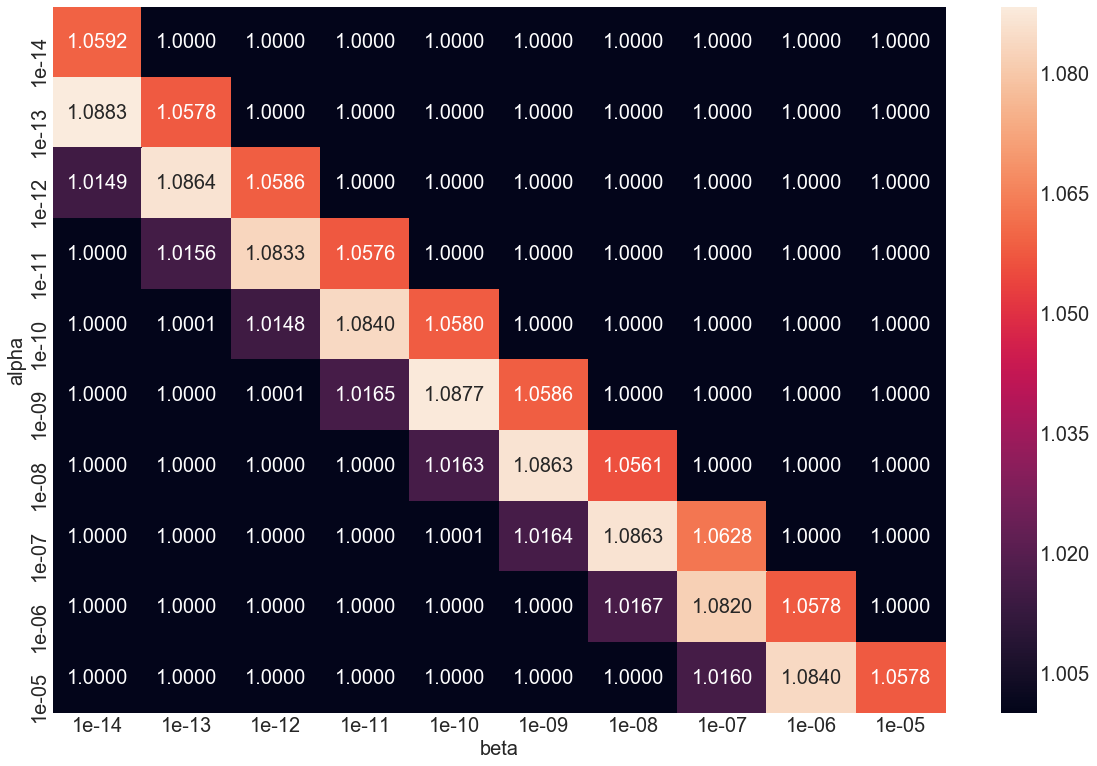

In [5]:
sns.heatmap(
    np.flip(np.mean(pof_pop, axis=2)),
    annot=True, fmt='.4f',
    xticklabels=np.flip(BETAS), yticklabels=np.flip(ALPHAS)
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()